<a href="https://colab.research.google.com/github/jrossonrinehart/AI_Assignment8/blob/main/Part1_gan_pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# create and train a pytorch digit classifier
# source: chatgpt with the prompt "create a pytorch mnist digit classifier"
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Set device to either CUDA or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Load the MNIST dataset and apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('../data', train=False, download=True, transform=transform)

# Set batch size and create data loaders
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Create an instance of the model and send it to the device
model = Net().to(device)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

#torch.save(model.state_dict(), 'model.pt')

#model.load_state_dict(torch.load('model.pt'))

Using downloaded and verified file: ../data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Using downloaded and verified file: ../data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Using downloaded and verified file: ../data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 682545.55it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Train Epoch: 0 [0/60000 (0%)]	Loss: 2.316127
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.839689
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.686100
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.450434
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.542492
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.465242
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.417470
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.480723
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.404644
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.241398
Test set: Average loss: 0.0028, Accuracy: 9462/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.384149
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.370678
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.263706
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.244247
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.326200
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.213814
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.077184
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.145115
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.152645
Tr

100%|██████████| 9912422/9912422 [00:00<00:00, 217928320.73it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30620751.72it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 69445724.81it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5767644.19it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch [1/100] Batch [1/469] Discriminator Loss: 1.4143 Generator Loss: 0.7032
Epoch [1/100] Batch [101/469] Discriminator Loss: 0.3308 Generator Loss: 1.7987
Epoch [1/100] Batch [201/469] Discriminator Loss: 0.6224 Generator Loss: 1.9630
Epoch [1/100] Batch [301/469] Discriminator Loss: 1.0382 Generator Loss: 1.0016
Epoch [1/100] Batch [401/469] Discriminator Loss: 1.1010 Generator Loss: 1.1875


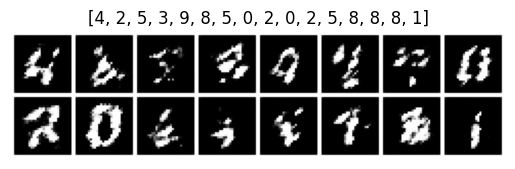

average prediction confidence over 100 predictions: 0.4147353172302246
prediction counts: [6, 2, 17, 18, 6, 7, 8, 3, 30, 3]
epoch time: 16.54275393486023, total time: 16.54275393486023
[tensor(0.4147, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6, 2, 17, 18, 6, 7, 8, 3, 30, 3]
Epoch [2/100] Batch [1/469] Discriminator Loss: 1.1859 Generator Loss: 0.8582
Epoch [2/100] Batch [101/469] Discriminator Loss: 1.1766 Generator Loss: 0.9704
Epoch [2/100] Batch [201/469] Discriminator Loss: 1.1442 Generator Loss: 0.9664
Epoch [2/100] Batch [301/469] Discriminator Loss: 1.0956 Generator Loss: 0.7489
Epoch [2/100] Batch [401/469] Discriminator Loss: 1.0926 Generator Loss: 1.0979


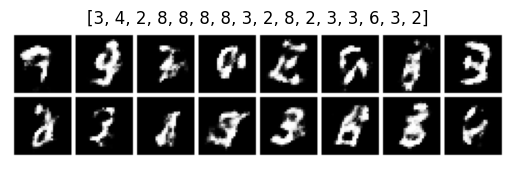

average prediction confidence over 100 predictions: 0.4518609941005707
prediction counts: [7, 0, 15, 26, 3, 7, 5, 2, 22, 13]
epoch time: 16.29416298866272, total time: 32.83691692352295
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[13, 2, 32, 44, 9, 14, 13, 5, 52, 16]
Epoch [3/100] Batch [1/469] Discriminator Loss: 1.0445 Generator Loss: 0.9854
Epoch [3/100] Batch [101/469] Discriminator Loss: 0.9985 Generator Loss: 1.0872
Epoch [3/100] Batch [201/469] Discriminator Loss: 1.0307 Generator Loss: 0.7862
Epoch [3/100] Batch [301/469] Discriminator Loss: 1.0654 Generator Loss: 0.7456
Epoch [3/100] Batch [401/469] Discriminator Loss: 0.9566 Generator Loss: 1.1974


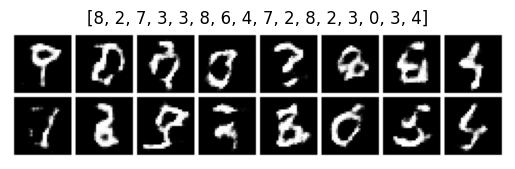

average prediction confidence over 100 predictions: 0.5025492906570435
prediction counts: [5, 2, 13, 19, 9, 3, 9, 12, 20, 8]
epoch time: 17.143962144851685, total time: 49.980879068374634
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[18, 4, 45, 63, 18, 17, 22, 17, 72, 24]
Epoch [4/100] Batch [1/469] Discriminator Loss: 0.9273 Generator Loss: 1.1412
Epoch [4/100] Batch [101/469] Discriminator Loss: 1.1421 Generator Loss: 0.6987
Epoch [4/100] Batch [201/469] Discriminator Loss: 1.1420 Generator Loss: 0.7450
Epoch [4/100] Batch [301/469] Discriminator Loss: 1.0455 Generator Loss: 1.0387
Epoch [4/100] Batch [401/469] Discriminator Loss: 1.0844 Genera

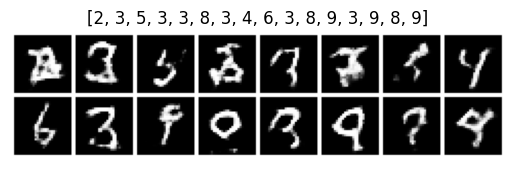

average prediction confidence over 100 predictions: 0.4951343536376953
prediction counts: [3, 3, 12, 22, 3, 8, 9, 13, 17, 10]
epoch time: 16.206207752227783, total time: 66.18708682060242
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[21, 7, 57, 85, 21, 25, 31, 30, 89, 34]
Epoch [5/100] Batch [1/469] Discriminator Loss: 1.1324 Generator Loss: 1.1627
Epoch [5/100] Batch [101/469] Discriminator Loss: 1.0687 Generator Loss: 0.8131
Epoch [5/100] Batch [201/469] Discriminator Loss: 1.1621 Generator Loss: 0.6131
Epoch [5/100] Batch [301/469] Discriminator Loss: 1.1002 Generator Loss: 0.9468
Epoch [5/100] Batch [401/469] Dis

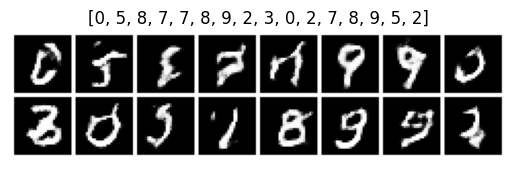

average prediction confidence over 100 predictions: 0.5098313689231873
prediction counts: [7, 0, 16, 17, 7, 10, 1, 9, 17, 16]
epoch time: 16.05798840522766, total time: 82.24507522583008
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[28, 7, 73, 102, 28, 35, 32, 39, 106, 50]
Epoch [6/100] Batch [1/469] Discriminator Loss: 1.0704 Generator Loss: 0.9150
Epoch [6/100] Batch [101/469] Discriminator Loss: 1.1638 Generator Loss: 0.7115
Epoch [6/100] Batch [201/469] Discriminator Loss: 1.0675 Generator Loss: 0.9203
Epoch [6/100] Batch [301/469] Discriminator Loss: 1.1195 Generator Loss: 0.7821
Ep

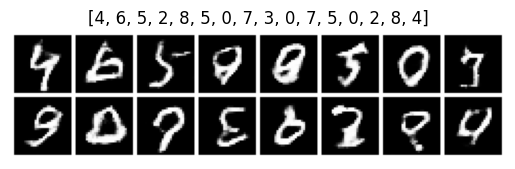

average prediction confidence over 100 predictions: 0.5593162178993225
prediction counts: [12, 5, 8, 12, 12, 12, 8, 13, 15, 3]
epoch time: 16.54674243927002, total time: 98.7918176651001
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[40, 12, 81, 114, 40, 47, 40, 52, 121, 53]
Epoch [7/100] Batch [1/469] Discriminator Loss: 1.1362 Generator Loss: 0.8766
Epoch [7/100] Batch [101/469] Discriminator Loss: 1.1092 Generator Loss: 1.2046
Epoch [7/100] Batch [201/469] Discriminator Loss: 1.1104 Generator Loss: 1.0442
Epoch [7/100] Batch [301/469] Discriminator Loss: 1

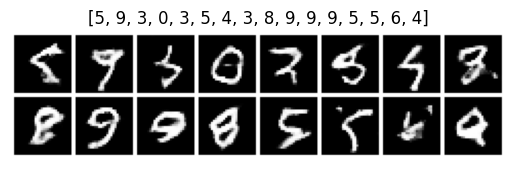

average prediction confidence over 100 predictions: 0.5140567421913147
prediction counts: [9, 5, 6, 14, 11, 11, 8, 7, 13, 16]
epoch time: 15.884881258010864, total time: 114.67669892311096
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[49, 17, 87, 128, 51, 58, 48, 59, 134, 69]
Epoch [8/100] Batch [1/469] Discriminator Loss: 1.0478 Generator Loss: 0.8193
Epoch [8/100] Batch [101/469] Discriminator Loss: 1.0893 Generator Loss: 0.9322
Epoch [8/100] Batch [201/469] Discriminator Loss: 1.1054 Generator Loss: 0.8216
Epoch [8/100] Batch

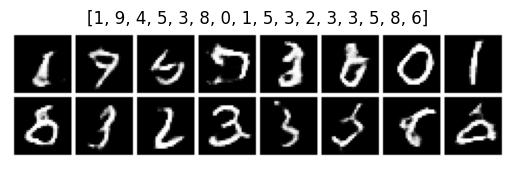

average prediction confidence over 100 predictions: 0.5364455580711365
prediction counts: [6, 4, 11, 19, 5, 11, 6, 13, 19, 6]
epoch time: 16.247543573379517, total time: 130.92424249649048
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[55, 21, 98, 147, 56, 69, 54, 72, 153, 75]
Epoch [9/100] Batch [1/469] Discriminator Loss: 1.0314 Generator Loss: 0.8977
Epoch [9/100] Batch [101/469] Discriminator Loss: 1.0653 Generator Loss: 0.7307
Epoch [9/100] Batch [201/469] Discriminator Loss: 1.1396 Generator Lo

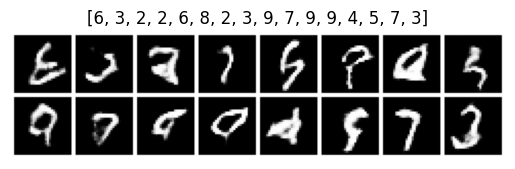

average prediction confidence over 100 predictions: 0.5299513339996338
prediction counts: [6, 3, 15, 20, 9, 12, 4, 7, 12, 12]
epoch time: 17.641274213790894, total time: 148.56551671028137
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[61, 24, 113, 167, 65, 81, 58, 79, 165, 87]
Epoch [10/100] Batch [1/469] Discriminator Loss: 1.0018 Generator Loss: 1.3597
Epoch [10/100] Batch [101/469] Discriminator Loss: 1.1521 Generator Loss: 1.6187
Epoch [10/100] Batch [201/469] Discr

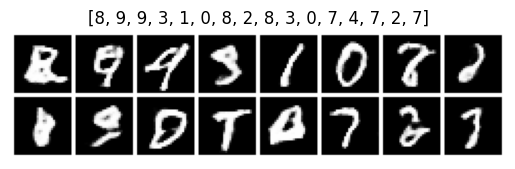

average prediction confidence over 100 predictions: 0.537780225276947
prediction counts: [9, 6, 9, 15, 9, 12, 4, 7, 18, 11]
epoch time: 16.31741738319397, total time: 164.88293409347534
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[70, 30, 122, 182, 74, 93, 62, 86, 183, 98]
Epoch [11/100] Batch [1/469] Discriminator Loss: 0.9820 Generator Loss: 0.8497
Epoch [11/100] Batch [101/469] Discriminator Loss: 0.9711 Generator Loss: 1.1713
Epoch [11

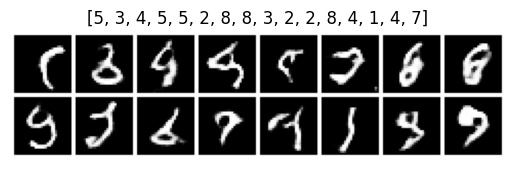

average prediction confidence over 100 predictions: 0.5338486433029175
prediction counts: [11, 6, 12, 12, 5, 15, 2, 6, 18, 13]
epoch time: 17.563235998153687, total time: 182.44617009162903
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[81, 36, 134, 194, 79, 108, 64, 92, 201, 111]
Epoch [12/100] Batch [1/469] Discriminator Loss: 0.9548 Generator Loss: 1.3744
Epoch [12/100] Batch [101/469] Discriminator Loss: 0.9

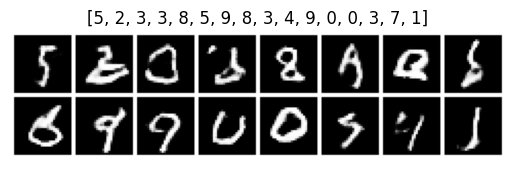

average prediction confidence over 100 predictions: 0.5622389316558838
prediction counts: [12, 4, 9, 20, 11, 6, 8, 5, 13, 12]
epoch time: 16.798598527908325, total time: 199.24476861953735
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[93, 40, 143, 214, 90, 114, 72, 97, 214, 123]
Epoch [13/100] Batch [1/469] Discriminator Loss: 0.9627 Generator Loss: 0.8474
Epoch [13/100] Batch [101

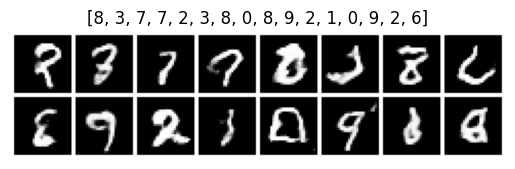

average prediction confidence over 100 predictions: 0.5629717707633972
prediction counts: [14, 3, 14, 11, 5, 10, 4, 10, 18, 11]
epoch time: 16.40401268005371, total time: 215.64878129959106
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[107, 43, 157, 225, 95, 124, 76, 107, 232, 134]
Epoch [14/100] Batch [1/469] Discriminator Loss: 0.9364 Generator Loss:

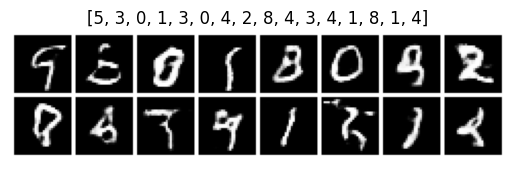

average prediction confidence over 100 predictions: 0.5506380200386047
prediction counts: [10, 5, 7, 14, 11, 8, 5, 6, 26, 8]
epoch time: 17.92600178718567, total time: 233.57478308677673
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[117, 48, 164, 239, 106, 132, 81, 113, 258, 142]
Epoch [15/100] Batch [1/469] Discriminator 

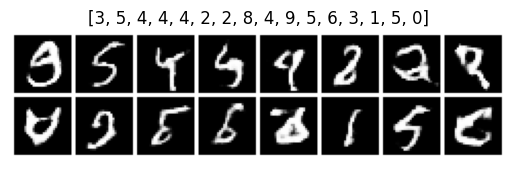

average prediction confidence over 100 predictions: 0.5587373971939087
prediction counts: [7, 2, 9, 15, 13, 12, 6, 6, 20, 10]
epoch time: 16.481727123260498, total time: 250.05651021003723
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[124, 50, 173, 254, 119, 144, 87, 119, 278, 152]
Epoch [16/1

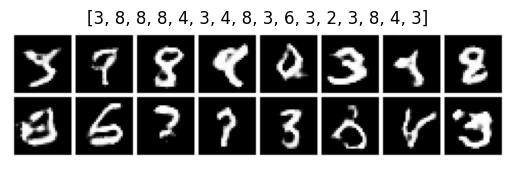

average prediction confidence over 100 predictions: 0.5766947865486145
prediction counts: [6, 4, 12, 20, 13, 7, 4, 7, 17, 10]
epoch time: 17.629205226898193, total time: 267.6857154369354
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[130, 54, 185, 274, 132, 151, 9

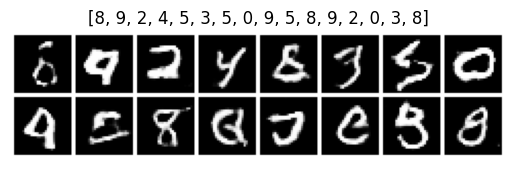

average prediction confidence over 100 predictions: 0.5679623484611511
prediction counts: [6, 2, 10, 12, 10, 14, 3, 14, 18, 11]
epoch time: 16.083312034606934, total time: 283.76902747154236
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

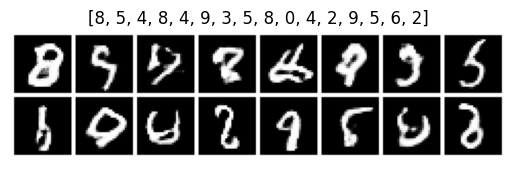

average prediction confidence over 100 predictions: 0.5326521992683411
prediction counts: [8, 4, 7, 15, 8, 6, 2, 15, 24, 11]
epoch time: 15.942333698272705, total time: 299.71136116981506
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

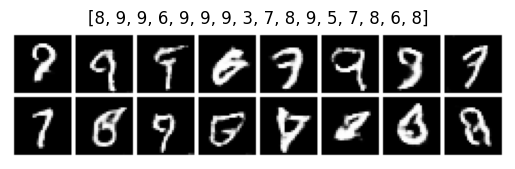

average prediction confidence over 100 predictions: 0.5356096625328064
prediction counts: [13, 2, 8, 11, 11, 5, 9, 8, 19, 14]
epoch time: 16.309630155563354, total time: 316.0209913253784
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

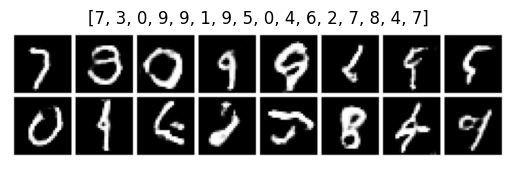

average prediction confidence over 100 predictions: 0.5645475387573242
prediction counts: [7, 3, 6, 20, 12, 6, 4, 13, 17, 12]
epoch time: 17.09609842300415, total time: 333.11708974838257
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

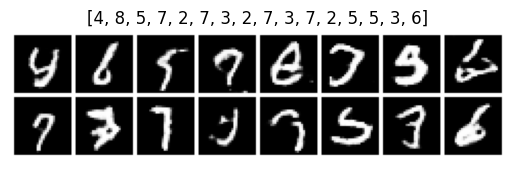

average prediction confidence over 100 predictions: 0.5452513098716736
prediction counts: [9, 7, 8, 21, 8, 12, 4, 12, 11, 8]
epoch time: 17.83561611175537, total time: 350.95270586013794
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

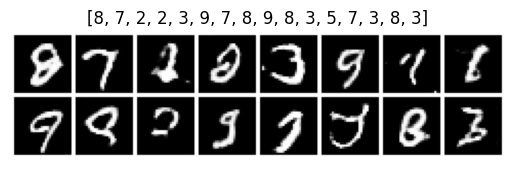

average prediction confidence over 100 predictions: 0.6121687889099121
prediction counts: [11, 2, 7, 19, 8, 7, 4, 16, 12, 14]
epoch time: 17.80565881729126, total time: 368.7583646774292
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

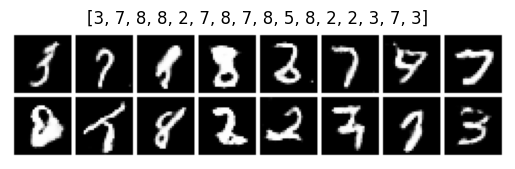

average prediction confidence over 100 predictions: 0.5878121256828308
prediction counts: [12, 1, 14, 12, 3, 8, 4, 16, 19, 11]
epoch time: 16.96982192993164, total time: 385.72818660736084
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

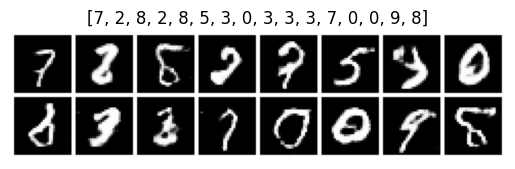

average prediction confidence over 100 predictions: 0.5627732872962952
prediction counts: [9, 2, 8, 21, 8, 7, 2, 11, 21, 11]
epoch time: 18.548405170440674, total time: 404.2765917778015
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), 0, 0, 0, 0, 0, 0, 0,

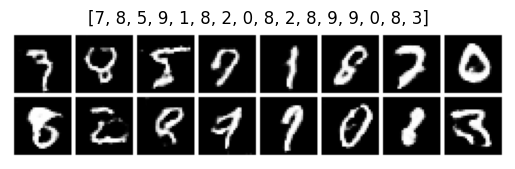

average prediction confidence over 100 predictions: 0.577508807182312
prediction counts: [14, 8, 10, 16, 6, 7, 3, 11, 13, 12]
epoch time: 17.174590587615967, total time: 421.4511823654175
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

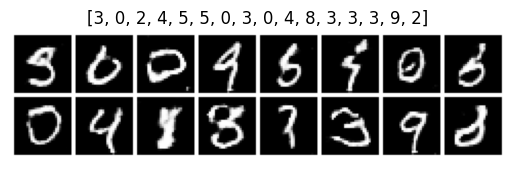

average prediction confidence over 100 predictions: 0.5682845711708069
prediction counts: [18, 1, 10, 15, 8, 7, 3, 8, 18, 12]
epoch time: 17.45929765701294, total time: 438.9104800224304
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

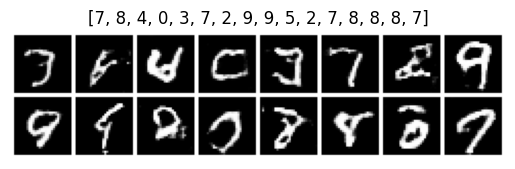

average prediction confidence over 100 predictions: 0.5691232681274414
prediction counts: [14, 2, 12, 12, 9, 6, 6, 17, 11, 11]
epoch time: 18.353466749191284, total time: 457.2639467716217
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

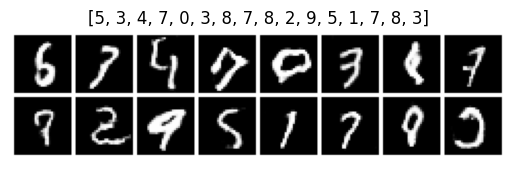

average prediction confidence over 100 predictions: 0.5562711954116821
prediction counts: [14, 5, 6, 12, 8, 8, 5, 16, 16, 10]
epoch time: 16.946328163146973, total time: 474.2102749347687
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

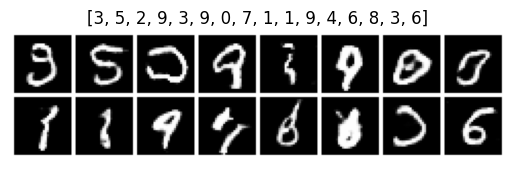

average prediction confidence over 100 predictions: 0.5294538140296936
prediction counts: [13, 3, 5, 13, 17, 7, 3, 12, 16, 11]
epoch time: 18.21869206428528, total time: 492.42896699905396
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

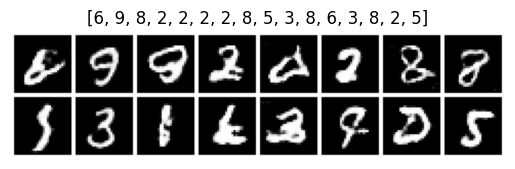

average prediction confidence over 100 predictions: 0.5334367752075195
prediction counts: [11, 3, 13, 15, 9, 15, 3, 9, 11, 11]
epoch time: 16.59814953804016, total time: 509.0271165370941
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

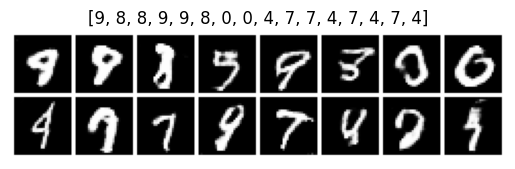

average prediction confidence over 100 predictions: 0.5400651693344116
prediction counts: [6, 1, 7, 16, 12, 8, 8, 14, 15, 13]
epoch time: 16.87419891357422, total time: 525.9013154506683
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

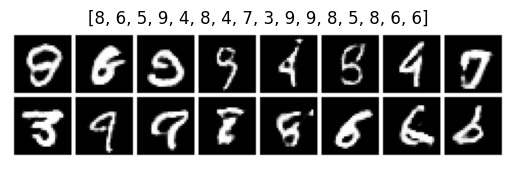

average prediction confidence over 100 predictions: 0.5732154250144958
prediction counts: [9, 1, 4, 14, 9, 13, 5, 12, 24, 9]
epoch time: 16.96891498565674, total time: 542.8702304363251
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, device

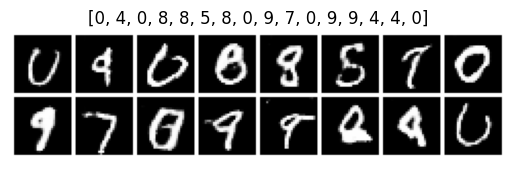

average prediction confidence over 100 predictions: 0.5730590224266052
prediction counts: [15, 5, 5, 7, 10, 9, 1, 14, 17, 17]
epoch time: 16.4355366230011, total time: 559.3057670593262
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, device

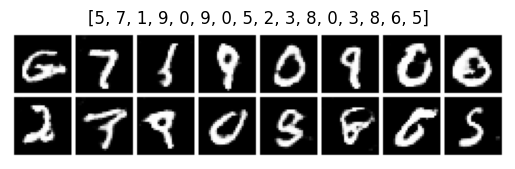

average prediction confidence over 100 predictions: 0.5836706161499023
prediction counts: [12, 4, 9, 18, 4, 10, 5, 9, 11, 18]
epoch time: 17.206892490386963, total time: 576.5126595497131
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

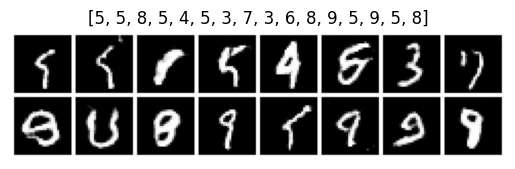

average prediction confidence over 100 predictions: 0.5753120183944702
prediction counts: [12, 3, 9, 18, 5, 12, 3, 10, 16, 12]
epoch time: 16.76531434059143, total time: 593.2779738903046
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

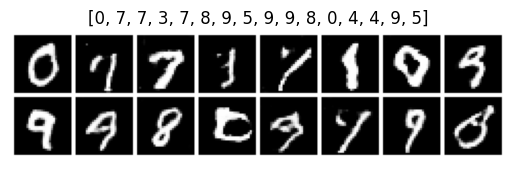

average prediction confidence over 100 predictions: 0.5899373292922974
prediction counts: [15, 3, 6, 8, 7, 10, 2, 18, 15, 16]
epoch time: 16.5265851020813, total time: 609.8045589923859
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, device

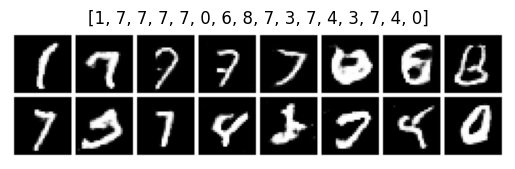

average prediction confidence over 100 predictions: 0.584663450717926
prediction counts: [8, 1, 7, 13, 6, 10, 2, 20, 16, 17]
epoch time: 16.806000471115112, total time: 626.610559463501
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, device

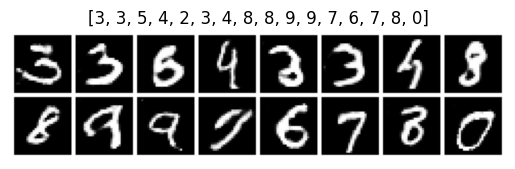

average prediction confidence over 100 predictions: 0.5978916883468628
prediction counts: [8, 4, 9, 11, 10, 7, 7, 17, 12, 15]
epoch time: 16.040828943252563, total time: 642.6513884067535
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

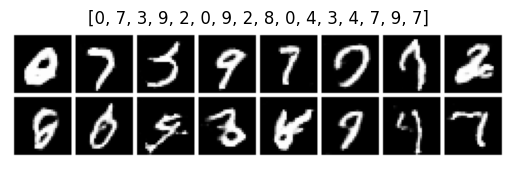

average prediction confidence over 100 predictions: 0.5377992391586304
prediction counts: [10, 2, 7, 14, 8, 9, 2, 9, 22, 17]
epoch time: 15.953300714492798, total time: 658.6046891212463
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

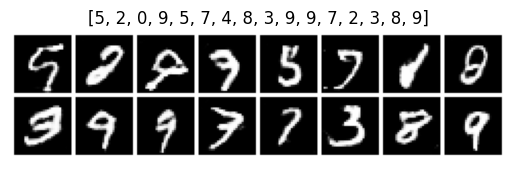

average prediction confidence over 100 predictions: 0.539966344833374
prediction counts: [12, 1, 6, 23, 6, 10, 0, 8, 13, 21]
epoch time: 16.73349118232727, total time: 675.3381803035736
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, device

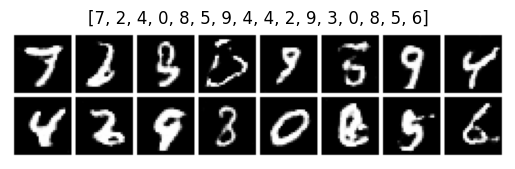

average prediction confidence over 100 predictions: 0.5578774213790894
prediction counts: [12, 4, 11, 10, 7, 7, 4, 9, 20, 16]
epoch time: 16.100400686264038, total time: 691.4385809898376
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

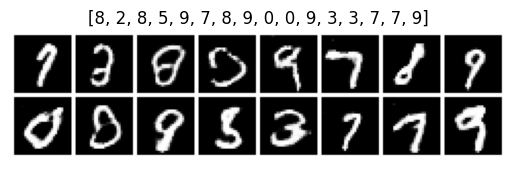

average prediction confidence over 100 predictions: 0.5893265604972839
prediction counts: [17, 4, 12, 10, 7, 7, 0, 16, 15, 12]
epoch time: 16.43120765686035, total time: 707.869788646698
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

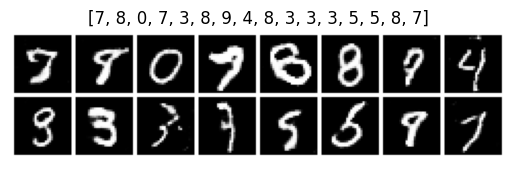

average prediction confidence over 100 predictions: 0.5819206237792969
prediction counts: [10, 3, 4, 15, 5, 10, 1, 13, 20, 19]
epoch time: 17.634297847747803, total time: 725.5040864944458
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

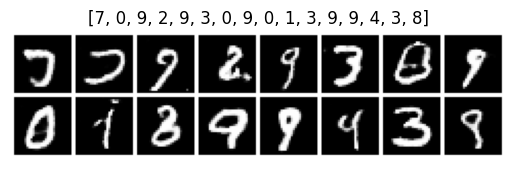

average prediction confidence over 100 predictions: 0.5857263803482056
prediction counts: [15, 3, 4, 18, 4, 8, 1, 15, 16, 16]
epoch time: 16.424217224121094, total time: 741.9283037185669
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

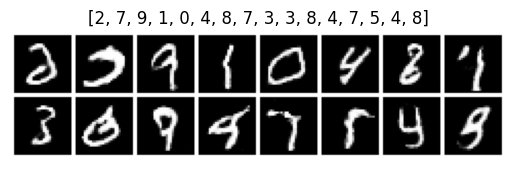

average prediction confidence over 100 predictions: 0.5882905125617981
prediction counts: [17, 2, 6, 14, 10, 4, 4, 8, 23, 12]
epoch time: 16.42168617248535, total time: 758.3499898910522
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

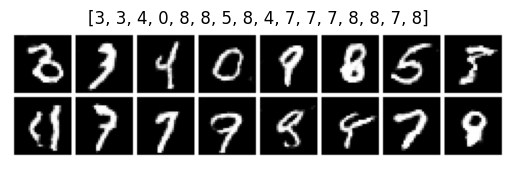

average prediction confidence over 100 predictions: 0.5706057548522949
prediction counts: [7, 4, 9, 15, 10, 10, 1, 19, 17, 8]
epoch time: 16.43086552619934, total time: 774.7808554172516
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

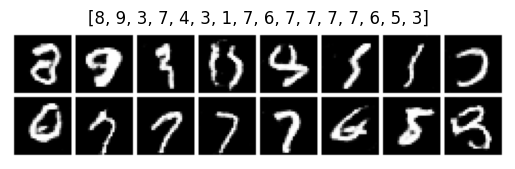

average prediction confidence over 100 predictions: 0.5596473813056946
prediction counts: [7, 6, 5, 19, 6, 4, 3, 14, 14, 22]
epoch time: 16.155612468719482, total time: 790.9364678859711
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

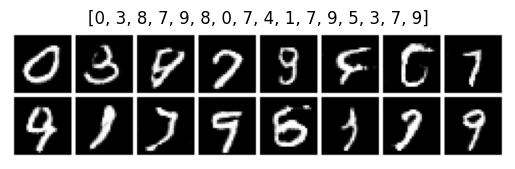

average prediction confidence over 100 predictions: 0.5500502586364746
prediction counts: [13, 1, 9, 13, 9, 7, 3, 13, 14, 18]
epoch time: 16.501785278320312, total time: 807.4382531642914
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

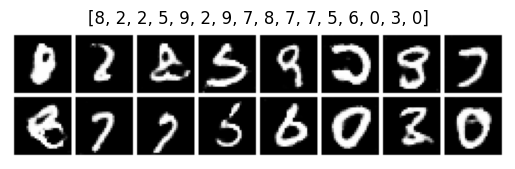

average prediction confidence over 100 predictions: 0.5796327590942383
prediction counts: [15, 0, 9, 11, 8, 9, 1, 13, 14, 20]
epoch time: 16.66261339187622, total time: 824.1008665561676
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

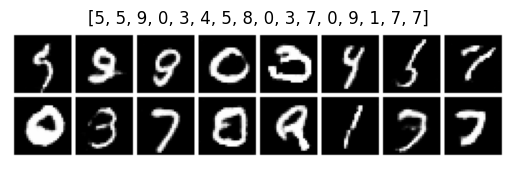

average prediction confidence over 100 predictions: 0.5704224705696106
prediction counts: [15, 2, 4, 15, 7, 4, 4, 16, 18, 15]
epoch time: 16.177741765975952, total time: 840.2786083221436
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

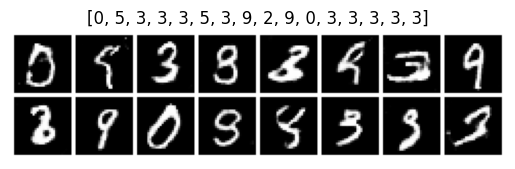

average prediction confidence over 100 predictions: 0.5494208335876465
prediction counts: [11, 3, 8, 27, 1, 9, 2, 11, 12, 16]
epoch time: 16.732636213302612, total time: 857.0112445354462
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

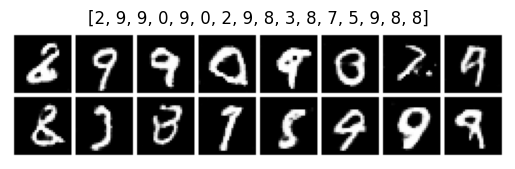

average prediction confidence over 100 predictions: 0.5641674399375916
prediction counts: [14, 2, 8, 9, 7, 9, 3, 15, 15, 18]
epoch time: 15.89751648902893, total time: 872.9087610244751
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, device

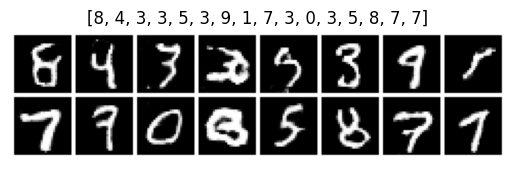

average prediction confidence over 100 predictions: 0.5954331755638123
prediction counts: [14, 2, 7, 23, 3, 6, 4, 10, 18, 13]
epoch time: 15.98094391822815, total time: 888.8897049427032
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

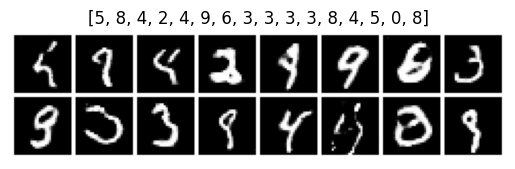

average prediction confidence over 100 predictions: 0.5854791402816772
prediction counts: [11, 1, 8, 13, 11, 7, 2, 13, 17, 17]
epoch time: 16.966890573501587, total time: 905.8565955162048
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

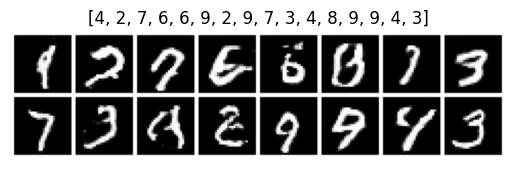

average prediction confidence over 100 predictions: 0.5713923573493958
prediction counts: [12, 1, 10, 12, 9, 5, 3, 14, 15, 19]
epoch time: 16.35936665534973, total time: 922.2159621715546
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

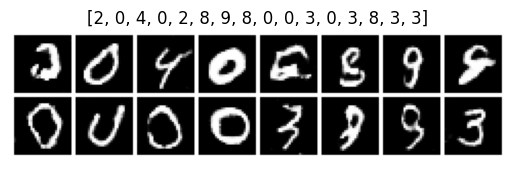

average prediction confidence over 100 predictions: 0.6276671290397644
prediction counts: [11, 3, 9, 20, 6, 11, 2, 11, 14, 13]
epoch time: 16.492977380752563, total time: 938.7089395523071
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

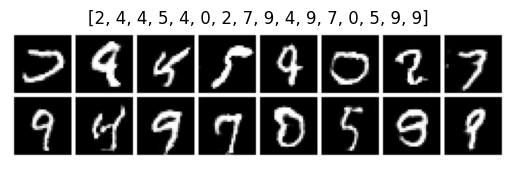

average prediction confidence over 100 predictions: 0.6091893315315247
prediction counts: [15, 1, 6, 13, 10, 6, 3, 18, 14, 14]
epoch time: 16.989377975463867, total time: 955.698317527771
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

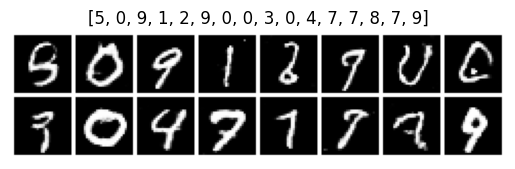

average prediction confidence over 100 predictions: 0.5882853269577026
prediction counts: [12, 4, 9, 13, 7, 3, 3, 19, 19, 11]
epoch time: 16.69303297996521, total time: 972.3913505077362
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

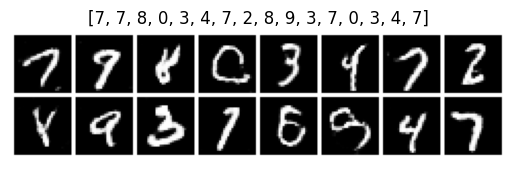

average prediction confidence over 100 predictions: 0.5806249976158142
prediction counts: [12, 2, 10, 12, 12, 8, 1, 11, 16, 16]
epoch time: 16.562126874923706, total time: 988.9534773826599
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, de

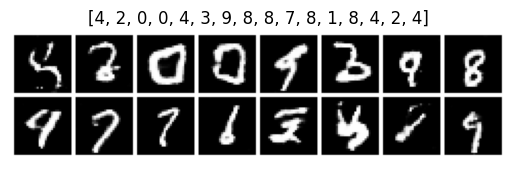

average prediction confidence over 100 predictions: 0.6099669337272644
prediction counts: [12, 2, 7, 16, 9, 8, 5, 8, 20, 13]
epoch time: 17.05712056159973, total time: 1006.0105979442596
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

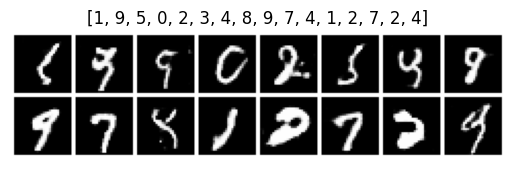

average prediction confidence over 100 predictions: 0.5965093374252319
prediction counts: [11, 4, 13, 11, 8, 9, 2, 18, 12, 12]
epoch time: 16.52517008781433, total time: 1022.535768032074
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

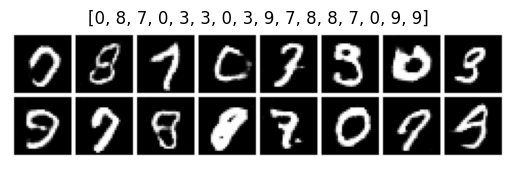

average prediction confidence over 100 predictions: 0.6147125363349915
prediction counts: [18, 4, 6, 13, 12, 4, 2, 16, 16, 9]
epoch time: 16.753641366958618, total time: 1039.2894093990326
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

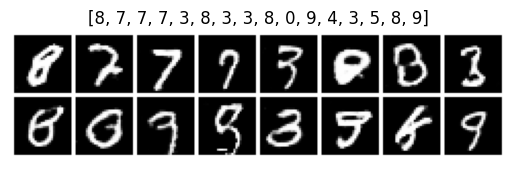

average prediction confidence over 100 predictions: 0.5851527452468872
prediction counts: [11, 1, 5, 14, 6, 6, 3, 22, 21, 11]
epoch time: 16.25700879096985, total time: 1055.5464181900024
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

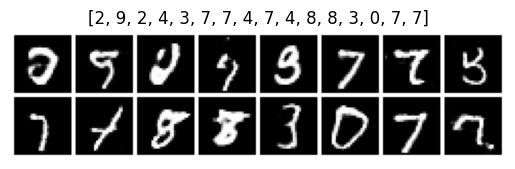

average prediction confidence over 100 predictions: 0.5942658185958862
prediction counts: [15, 2, 9, 11, 4, 8, 1, 26, 13, 11]
epoch time: 16.35058331489563, total time: 1071.897001504898
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

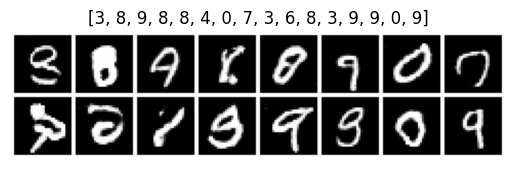

average prediction confidence over 100 predictions: 0.5961251854896545
prediction counts: [11, 4, 8, 11, 6, 9, 3, 14, 13, 21]
epoch time: 16.899200201034546, total time: 1088.7962017059326
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

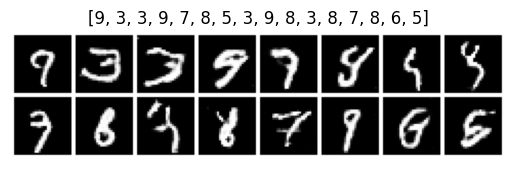

average prediction confidence over 100 predictions: 0.602229654788971
prediction counts: [13, 1, 6, 15, 7, 6, 3, 22, 13, 14]
epoch time: 16.463544607162476, total time: 1105.259746313095
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

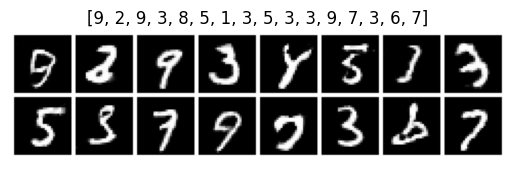

average prediction confidence over 100 predictions: 0.6085361242294312
prediction counts: [6, 1, 7, 23, 10, 8, 4, 11, 12, 18]
epoch time: 16.116297483444214, total time: 1121.3760437965393
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

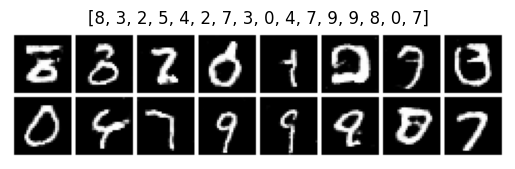

average prediction confidence over 100 predictions: 0.6035142540931702
prediction counts: [7, 2, 10, 21, 12, 4, 0, 17, 10, 17]
epoch time: 16.904810190200806, total time: 1138.28085398674
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

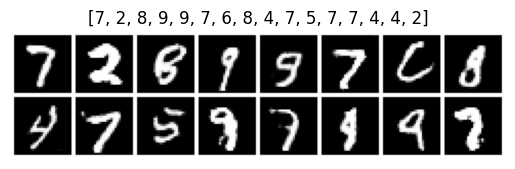

average prediction confidence over 100 predictions: 0.5854975581169128
prediction counts: [8, 0, 9, 19, 9, 5, 3, 18, 11, 18]
epoch time: 16.675398111343384, total time: 1154.9562520980835
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

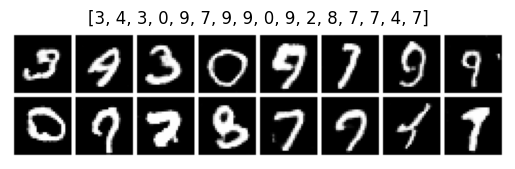

average prediction confidence over 100 predictions: 0.619593620300293
prediction counts: [7, 0, 11, 16, 11, 5, 1, 22, 9, 18]
epoch time: 16.467848300933838, total time: 1171.4241003990173
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

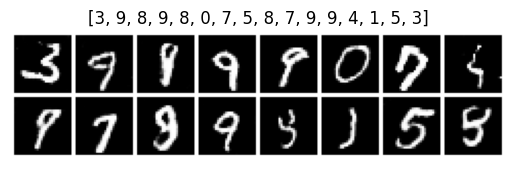

average prediction confidence over 100 predictions: 0.6305823922157288
prediction counts: [16, 3, 6, 11, 8, 10, 2, 18, 14, 12]
epoch time: 17.027812004089355, total time: 1188.4519124031067
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, de

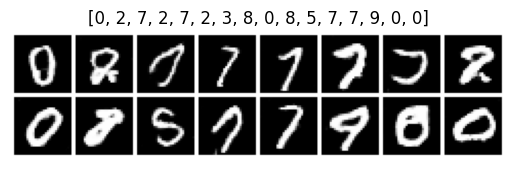

average prediction confidence over 100 predictions: 0.5937947034835815
prediction counts: [18, 1, 4, 7, 11, 4, 1, 22, 15, 17]
epoch time: 16.19422674179077, total time: 1204.6461391448975
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

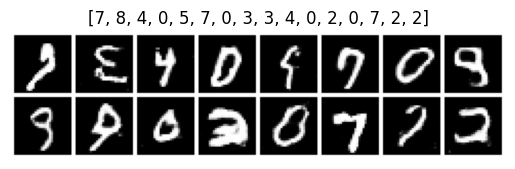

average prediction confidence over 100 predictions: 0.5897245407104492
prediction counts: [12, 1, 10, 19, 8, 4, 3, 23, 12, 8]
epoch time: 16.509849309921265, total time: 1221.1559884548187
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

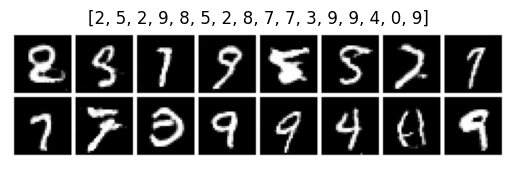

average prediction confidence over 100 predictions: 0.5966039299964905
prediction counts: [9, 0, 11, 13, 11, 7, 5, 19, 9, 16]
epoch time: 17.056958198547363, total time: 1238.212946653366
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

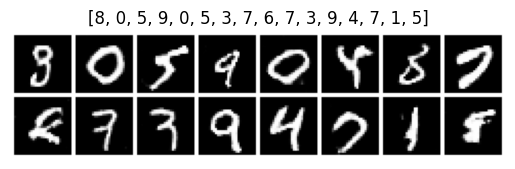

average prediction confidence over 100 predictions: 0.5881132483482361
prediction counts: [13, 5, 8, 12, 7, 9, 1, 17, 11, 17]
epoch time: 16.260567903518677, total time: 1254.4735145568848
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

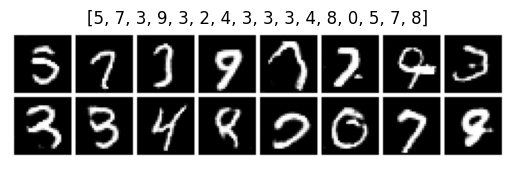

average prediction confidence over 100 predictions: 0.6037238836288452
prediction counts: [14, 1, 7, 17, 8, 4, 3, 14, 12, 20]
epoch time: 16.71994709968567, total time: 1271.1934616565704
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

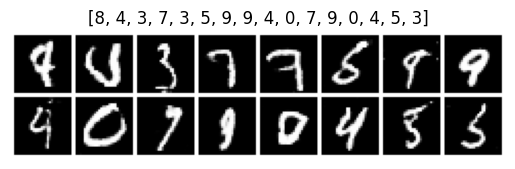

average prediction confidence over 100 predictions: 0.5767145156860352
prediction counts: [15, 0, 5, 9, 9, 7, 1, 15, 16, 23]
epoch time: 16.381460189819336, total time: 1287.5749218463898
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

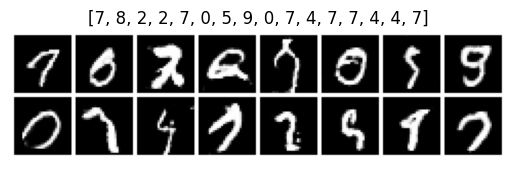

average prediction confidence over 100 predictions: 0.55599445104599
prediction counts: [11, 2, 9, 10, 13, 8, 4, 17, 10, 16]
epoch time: 16.228702545166016, total time: 1303.8036243915558
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

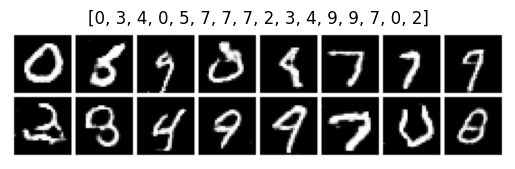

average prediction confidence over 100 predictions: 0.5926821827888489
prediction counts: [13, 1, 10, 17, 8, 11, 4, 18, 7, 11]
epoch time: 16.19335126876831, total time: 1319.996975660324
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

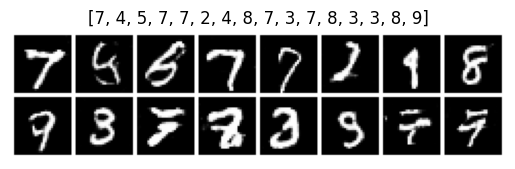

average prediction confidence over 100 predictions: 0.5684283375740051
prediction counts: [9, 0, 7, 16, 10, 6, 6, 20, 12, 14]
epoch time: 16.340888500213623, total time: 1336.3378641605377
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

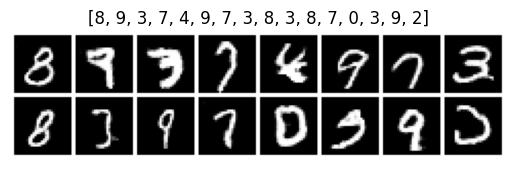

average prediction confidence over 100 predictions: 0.5753421783447266
prediction counts: [11, 4, 3, 18, 8, 4, 5, 22, 12, 13]
epoch time: 15.773889780044556, total time: 1352.1117539405823
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

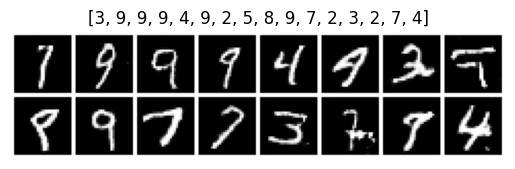

average prediction confidence over 100 predictions: 0.5867217183113098
prediction counts: [5, 0, 12, 15, 9, 6, 2, 23, 11, 17]
epoch time: 16.096945762634277, total time: 1368.2086997032166
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

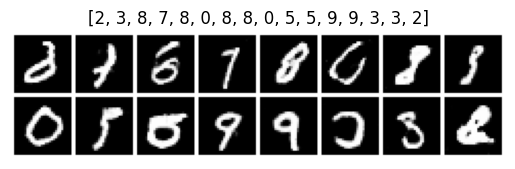

average prediction confidence over 100 predictions: 0.6284806132316589
prediction counts: [11, 3, 4, 17, 14, 6, 1, 20, 15, 9]
epoch time: 16.55237913131714, total time: 1384.7610788345337
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

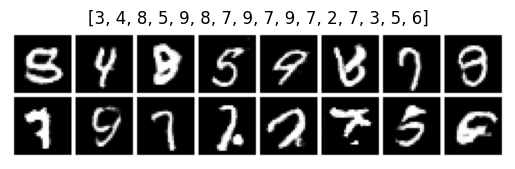

average prediction confidence over 100 predictions: 0.6074410080909729
prediction counts: [14, 1, 5, 17, 5, 10, 5, 15, 17, 11]
epoch time: 16.0103657245636, total time: 1400.7714445590973
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

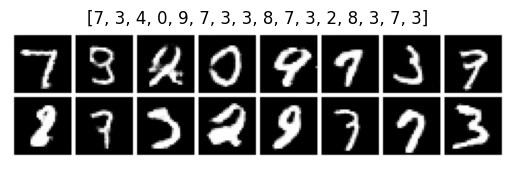

average prediction confidence over 100 predictions: 0.6234562397003174
prediction counts: [12, 0, 13, 17, 11, 4, 1, 18, 10, 14]
epoch time: 15.935213804244995, total time: 1416.7066583633423
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, d

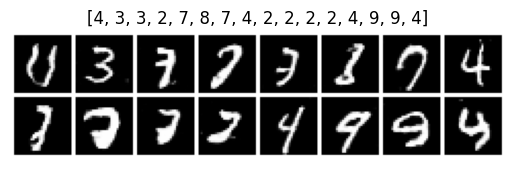

average prediction confidence over 100 predictions: 0.5920737981796265
prediction counts: [7, 2, 12, 13, 9, 6, 5, 20, 9, 17]
epoch time: 16.916461944580078, total time: 1433.6231203079224
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

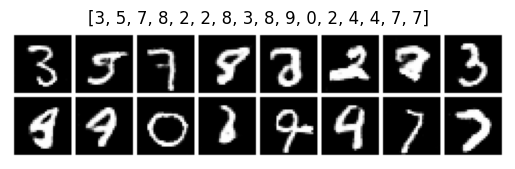

average prediction confidence over 100 predictions: 0.6336597204208374
prediction counts: [11, 0, 8, 17, 11, 5, 3, 20, 13, 12]
epoch time: 15.942167043685913, total time: 1449.5652873516083
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, de

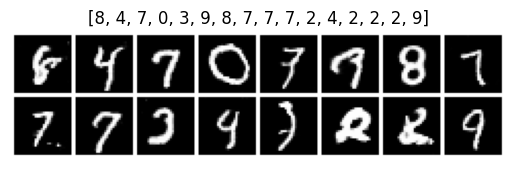

average prediction confidence over 100 predictions: 0.5809299945831299
prediction counts: [9, 2, 12, 15, 4, 8, 4, 16, 13, 17]
epoch time: 16.71892738342285, total time: 1466.2842147350311
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

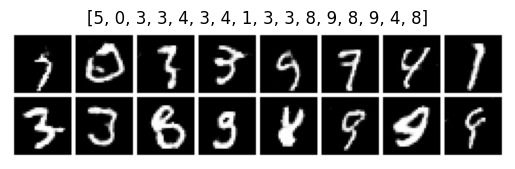

average prediction confidence over 100 predictions: 0.5906201601028442
prediction counts: [13, 2, 7, 16, 8, 5, 2, 16, 18, 13]
epoch time: 16.609659433364868, total time: 1482.893874168396
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

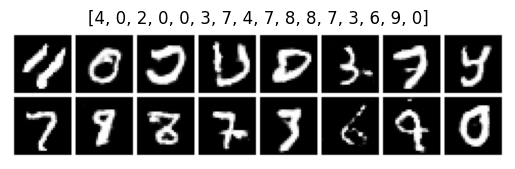

average prediction confidence over 100 predictions: 0.6241649985313416
prediction counts: [14, 0, 9, 12, 8, 3, 3, 26, 10, 15]
epoch time: 16.286194801330566, total time: 1499.1800689697266
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

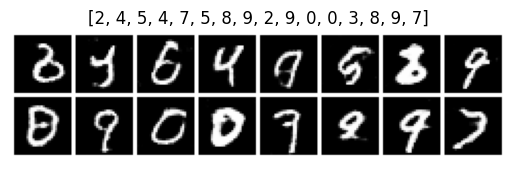

average prediction confidence over 100 predictions: 0.5840041041374207
prediction counts: [13, 2, 9, 14, 7, 7, 2, 18, 9, 19]
epoch time: 16.61065173149109, total time: 1515.7907207012177
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

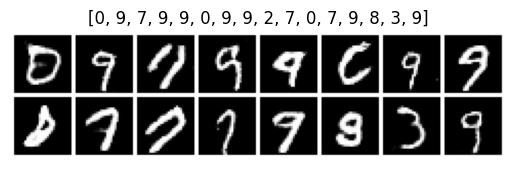

average prediction confidence over 100 predictions: 0.5714462995529175
prediction counts: [12, 1, 10, 13, 7, 6, 1, 19, 10, 21]
epoch time: 16.11353635787964, total time: 1531.9042570590973
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

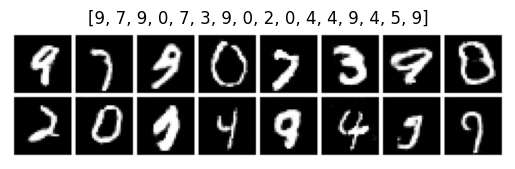

average prediction confidence over 100 predictions: 0.6288534998893738
prediction counts: [13, 0, 4, 18, 6, 6, 0, 25, 11, 17]
epoch time: 16.010000467300415, total time: 1547.9142575263977
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

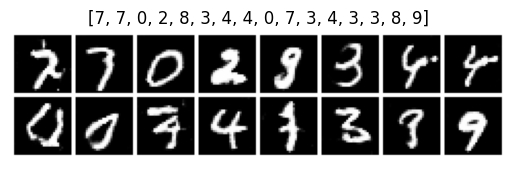

average prediction confidence over 100 predictions: 0.5842922329902649
prediction counts: [12, 2, 7, 19, 13, 4, 0, 21, 11, 11]
epoch time: 16.421170711517334, total time: 1564.335428237915
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

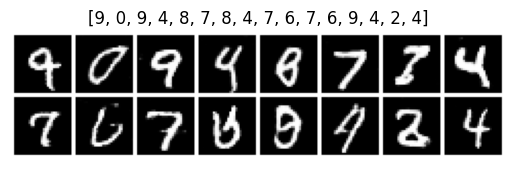

average prediction confidence over 100 predictions: 0.6188367605209351
prediction counts: [7, 0, 7, 20, 14, 3, 4, 15, 12, 18]
epoch time: 16.31399631500244, total time: 1580.6494245529175
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

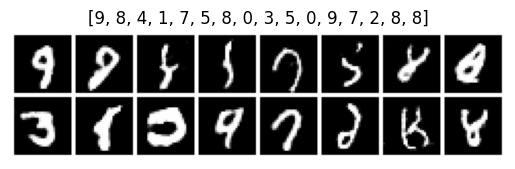

average prediction confidence over 100 predictions: 0.5589041709899902
prediction counts: [9, 5, 9, 10, 8, 9, 2, 23, 12, 13]
epoch time: 15.857706785202026, total time: 1596.5071313381195
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devi

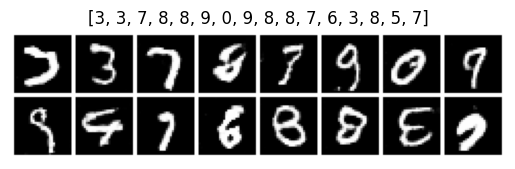

average prediction confidence over 100 predictions: 0.6069126129150391
prediction counts: [12, 0, 7, 9, 10, 9, 5, 17, 16, 15]
epoch time: 16.585124492645264, total time: 1613.0922558307648
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, dev

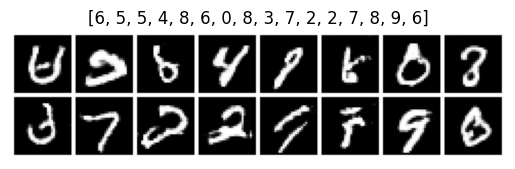

average prediction confidence over 100 predictions: 0.6181418895721436
prediction counts: [8, 2, 7, 15, 5, 7, 6, 18, 17, 15]
epoch time: 16.412856340408325, total time: 1629.505112171173
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, devic

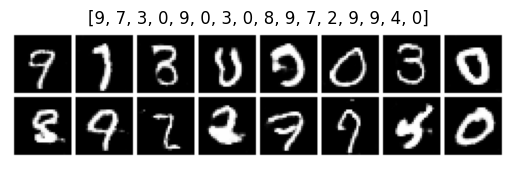

average prediction confidence over 100 predictions: 0.6287423968315125
prediction counts: [16, 2, 7, 10, 12, 2, 4, 15, 14, 18]
epoch time: 15.976710319519043, total time: 1645.4818224906921
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, de

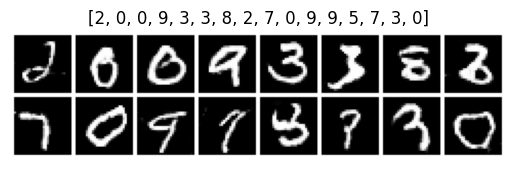

average prediction confidence over 100 predictions: 0.648894727230072
prediction counts: [6, 2, 7, 18, 7, 8, 0, 22, 6, 24]
epoch time: 16.078381061553955, total time: 1661.560203552246
[tensor(0.4147, device='cuda:0'), tensor(0.4519, device='cuda:0'), tensor(0.5025, device='cuda:0'), tensor(0.4951, device='cuda:0'), tensor(0.5098, device='cuda:0'), tensor(0.5593, device='cuda:0'), tensor(0.5141, device='cuda:0'), tensor(0.5364, device='cuda:0'), tensor(0.5300, device='cuda:0'), tensor(0.5378, device='cuda:0'), tensor(0.5338, device='cuda:0'), tensor(0.5622, device='cuda:0'), tensor(0.5630, device='cuda:0'), tensor(0.5506, device='cuda:0'), tensor(0.5587, device='cuda:0'), tensor(0.5767, device='cuda:0'), tensor(0.5680, device='cuda:0'), tensor(0.5327, device='cuda:0'), tensor(0.5356, device='cuda:0'), tensor(0.5645, device='cuda:0'), tensor(0.5453, device='cuda:0'), tensor(0.6122, device='cuda:0'), tensor(0.5878, device='cuda:0'), tensor(0.5628, device='cuda:0'), tensor(0.5775, device=

In [ ]:
#OK now we have a good model for analyzing the output from our GAN
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.fc = nn.Linear(100, 7 * 7 * 128)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)
        x = self.relu(self.conv1(x))
        x = self.tanh(self.conv2(x))
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(7 * 7 * 128, 1)

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(-1, 7 * 7 * 128)
        x = self.sigmoid(self.fc(x))
        return x

# Instantiate the generator and discriminator networks
generator = Generator()
discriminator = Discriminator()

# Define the loss function and optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Load the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Define the number of epochs and the device to use
num_epochs = 100
device = torch.device('cuda')

# Move the generator and discriminator networks to the device
generator.to(device)
discriminator.to(device)

# Train the generator and discriminator networks
time_total = 0

#intialize total counts and totals of average confidence to recreate matplotlib graphs from assignment prompt
total_counts = [0]*10
total_avg_conf = [0]*100
d_losses = []
g_losses = []
for epoch in range(num_epochs):
    time_epoch = 0
    start = time.time()
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.shape[0]
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train the discriminator network
        discriminator_optimizer.zero_grad()
        real_images = real_images.to(device)
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # Train the generator network
        generator_optimizer.zero_grad()
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        generator_loss = criterion(fake_outputs, real_labels)
        generator_loss.backward()
        generator_optimizer.step()

        # Print the loss statistics
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i+1}/{len(dataloader)}] '
                  f'Discriminator Loss: {discriminator_loss.item():.4f} '
                  f'Generator Loss: {generator_loss.item():.4f}')

    # Generate 100 samples and count how many of each digit 
    with torch.no_grad():
        # Define the fixed noise vector for generating samples
        sample_noise = torch.randn(100, 100, device=device)
        generated_images = generator(sample_noise)
        generated_images = 0.5 * (generated_images + 1)
        output = model(generated_images)
        pred = output.argmax(dim=1, keepdim=True)
        grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title([int(pred[x]) for x in range(16)])
        plt.show()
        #print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
        avg_conf = torch.mean(torch.exp(output).max(dim=1).values)
        
        
        
        counts = [0]*10
        
        for p in pred:
            counts[p] += 1
            #add to total counts
            total_counts[p] += 1
    
    g_losses.append(generator_loss.item())
    d_losses.append(discriminator_loss.item())

    time_epoch = time.time() - start
    time_total += time_epoch
    print(f"average prediction confidence over 100 predictions: {avg_conf}")
    print(f"prediction counts: {counts}")
    print(f"epoch time: {time_epoch}, total time: {time_total}")

    #just making sure the right values are being added to my totals arrays
    total_avg_conf[epoch] = avg_conf
    print(total_avg_conf)
    print(total_counts)
        



In [ ]:
print(total_counts)

[1100, 237, 853, 1516, 836, 758, 338, 1459, 1507, 1396]


#Recreate Graphs from assignment prompt


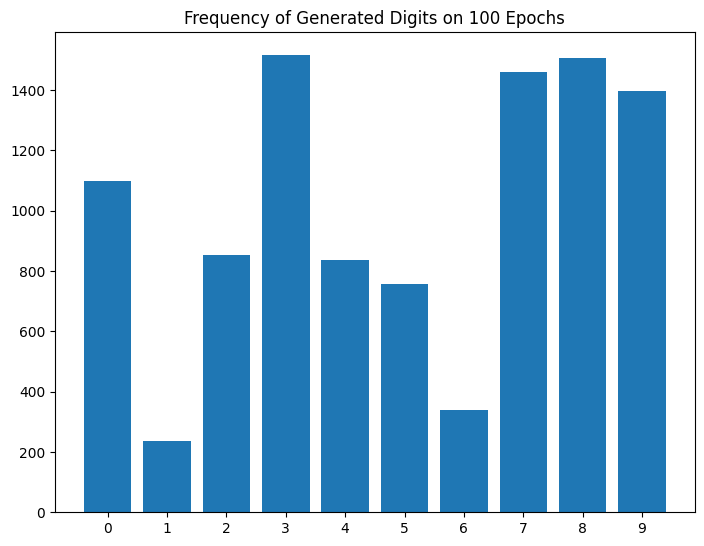

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
nums = [0,1,2,3,4,5,6,7,8,9]
ax.bar(nums,total_counts)
plt.xticks(range(len(nums)), nums)
plt.title("Frequency of Generated Digits on 100 Epochs")
plt.show()

In [ ]:
#turn tensor objects into floats
averages = []
for i in total_avg_conf:
  averages.append(i.item())
print(averages)



[0.4147353172302246, 0.4518609941005707, 0.5025492906570435, 0.4951343536376953, 0.5098313689231873, 0.5593162178993225, 0.5140567421913147, 0.5364455580711365, 0.5299513339996338, 0.537780225276947, 0.5338486433029175, 0.5622389316558838, 0.5629717707633972, 0.5506380200386047, 0.5587373971939087, 0.5766947865486145, 0.5679623484611511, 0.5326521992683411, 0.5356096625328064, 0.5645475387573242, 0.5452513098716736, 0.6121687889099121, 0.5878121256828308, 0.5627732872962952, 0.577508807182312, 0.5682845711708069, 0.5691232681274414, 0.5562711954116821, 0.5294538140296936, 0.5334367752075195, 0.5400651693344116, 0.5732154250144958, 0.5730590224266052, 0.5836706161499023, 0.5753120183944702, 0.5899373292922974, 0.584663450717926, 0.5978916883468628, 0.5377992391586304, 0.539966344833374, 0.5578774213790894, 0.5893265604972839, 0.5819206237792969, 0.5857263803482056, 0.5882905125617981, 0.5706057548522949, 0.5596473813056946, 0.5500502586364746, 0.5796327590942383, 0.5704224705696106, 0.5

Text(0.5, 1.0, 'total average confidence over 100 epochs')

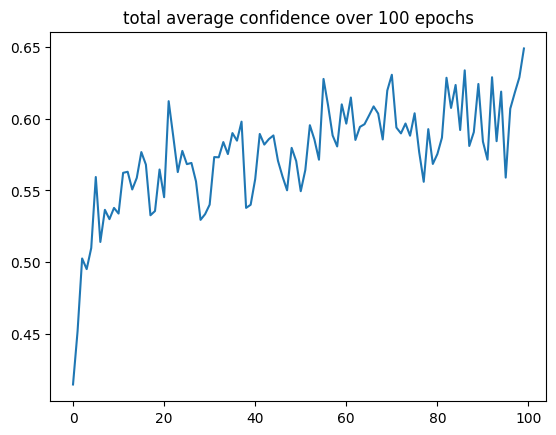

In [ ]:
plt.plot(averages)
plt.title("total average confidence over 100 epochs")